<a href="https://colab.research.google.com/github/JinMizar/ds3001_final_project/blob/main/Pre_Analysis_Plan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-Analysis Plan
## DS3001 Final Project

*Team Members: Jinhong Zhao, Tong Zhou, Hanna Svenson*

The pre-analysis plan will outline the procedure for exploring which chemical properties most influence the quality of Portuguese red wine based on our dataset. The investigation will center on the question: Which properties are most predictive of the quality of wine? Each observation within the dataset represents one sample of Portuguese red wine, and includes 11 wine properties and a quality rating from 1-10 based on a sensory evaluation. With these variables, this project aims to predict wine quality, providing valuable insights to consumers looking to make better purchasing decisions and to wine producers looking to improve their production processes.



The analysis will be a supervised learning classification task. Although wine quality is rated on a scale of 1-10, an examination of the dataset shows that the assigned ranks for samples only range from 3 to 8, with significantly more wines rated in the mid-range values of 5 and 6. To address this imbalance, we will create custom categories for the wine rankings: low (rank 3-4), medium (rank 5-6), and high (rank 7-8). This approach will provide more model stability, as fewer classes will provide more samples per class, making the model less sensitive to small variations within each category. This interpretation will still align well with the needs of producers and consumers, who would likely be interested in the general quality (low, medium, high) rather than specific distinctions between close ratings.







In [1]:
! git clone https://github.com/JinMizar/ds3001_final_project.git

Cloning into 'ds3001_final_project'...
remote: Enumerating objects: 46, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 46 (delta 18), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (46/46), 673.23 KiB | 6.60 MiB/s, done.
Resolving deltas: 100% (18/18), done.


(array([  6.,  33., 483., 462., 143.,  16.]),
 array([3.        , 3.83333333, 4.66666667, 5.5       , 6.33333333,
        7.16666667, 8.        ]),
 <BarContainer object of 6 artists>)

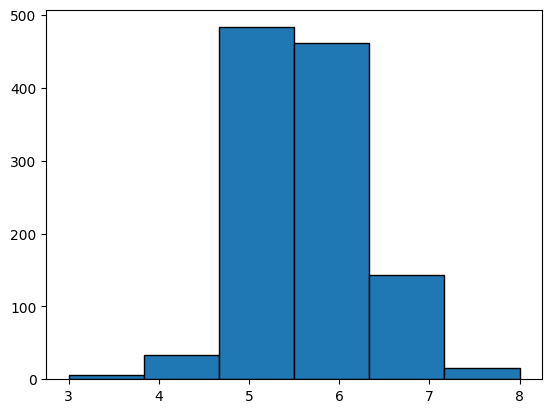

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

df = pd.read_csv('ds3001_final_project/data/WineQT.csv',low_memory=False)

plt.hist(df['quality'], bins=6, edgecolor='black')

quality_category
medium    945
high      159
low        39
Name: count, dtype: int64


(array([945., 159.,  39.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

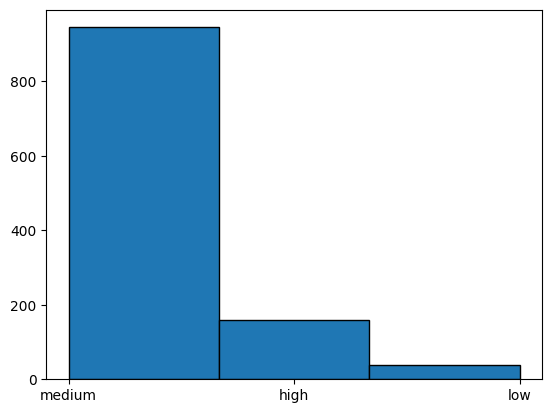

In [32]:
def categorize_quality(rating):
    if rating in [3, 4]:
        return 'low'
    elif rating in [5, 6]:
        return 'medium'
    elif rating in [7, 8]:
        return 'high'


df['quality_category'] = df['quality'].apply(categorize_quality)
print(df['quality_category'].value_counts())
plt.hist(df['quality_category'], bins=3, edgecolor='black')

The success of the analysis will be determined by the F1 score and a confusion matrix. The F1 score will provide a balanced view of the model's performance across classes, especially in distinguishing the rarer categories of high- and low-quality wines. The confusion matrix will help identify specific misclassification patterns, such as whether low-quality wines are mistakenly classified as high-quality or if wines tend to be misclassified into their neighbor quality group. This will offer deeper insight into the model’s ability to differentiate among quality levels accurately.


We anticipate several challenges in the analysis:
1. The imbalanced distribution of wine quality ratings, which could lead to the model over-predicting medium-quality wines if not addressed.
2. Multicollinearity among the wine properties, which could interfere with model performance.
3. Small sample sizes, which could reduce model stability.

*Imbalanced distribution*

Since the majority of data focuses on the 'median' category, classifying numerical output into three groups may not fully address the problem. Therefore, we aim to ensure that there are enough samples in each category in order to prevent the model from being biased toward the 'median' class. Oversampling serves as a practical approach to fulfilling expectations by duplicating existing samples in minority classes to boost their numbers. In this project, we do not consider undersampling the majority class due to the limited sample sizes.

945
quality_category
high      945
medium    945
low       945
Name: count, dtype: int64


(array([945., 945., 945.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

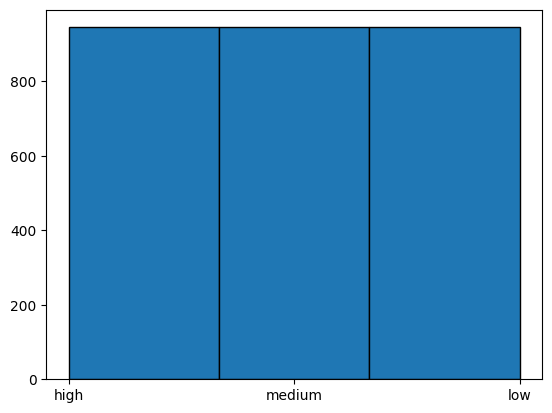

In [40]:
low_class = df.loc[df['quality_category'] == 'low']
medium_class = df.loc[df['quality_category'] == 'medium']
high_class = df.loc[df['quality_category'] == 'high']

med_size = len(medium_class)
print(med_size)
low_class_oversampled = resample(low_class, replace=True, n_samples=med_size, random_state=42)
high_class_oversampled = resample(high_class, replace=True, n_samples=med_size, random_state=42)

df_oversampled = pd.concat([low_class_oversampled, medium_class, high_class_oversampled])
df_oversampled = df_oversampled.sample(frac=1, random_state=42)

print(df_oversampled['quality_category'].value_counts())
plt.hist(df_oversampled['quality_category'], bins=3, edgecolor='black')

*Multicollinearity among wine properties*

The heatmap indicates that certain variables demonstrate a positive correlation with one another. This includes density and fixed acidity, which have a correlation of 0.68; citric acid and fixed acidity, with a correlation of 0.67; and total sulfur dioxide and free sulfur dioxide, showing a correlation of 0.66. Conversely, some variables exhibit a negative correlation, such as pH and fixed acidity, with a correlation of -0.69; pH and citric acid, which have a correlation of -0.55; and citric acid and volatile acidity, with a correlation of -0.54. In future analyses, it will be essential to examine the potential multicollinearity among these variables. We consider using Lasso regression in the later analysis to minimize the impact of correlated variables.

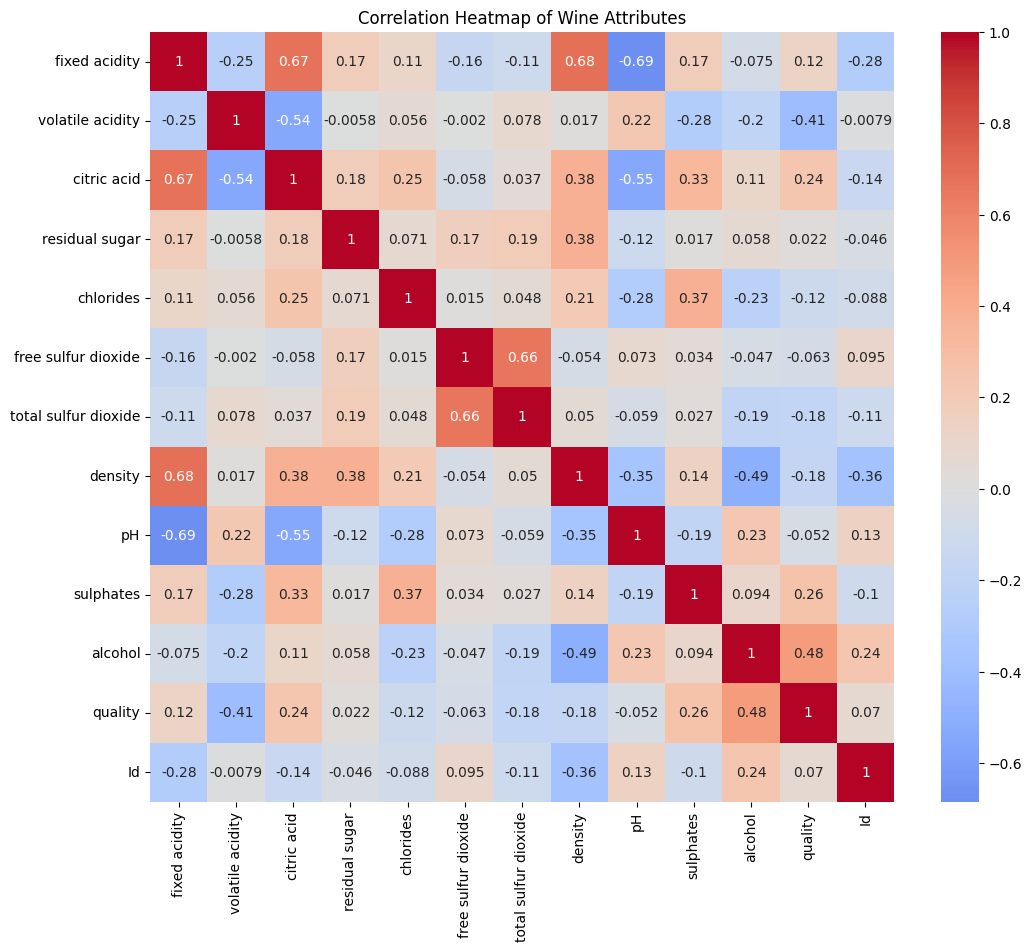

In [26]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Wine Attributes")
plt.show()

In [ ]:
# Possible ways to handle small sample sizes?

NOT DONE ->

- What models or algorithms do you plan to use in your analysis? How? (Start with Logistic Regression and Decision Trees, and consider using Random Forest or Lasso for better handling of multicollinearity)
- How will you know if your approach "works"? What does success mean?

In [ ]:
## initial coding?



If the approach fails to accurately predict wine quality, several insights could still be gained. First, it may indicate that the chosen chemical properties do not have a strong predictive relationship with wine quality ratings. This could encourage future exploration with non-chemical properties, such as grape variety, vineyard location, winemaking techniques, or aging process. Additionally, failure could reveal limitations due to the dataset's size or imbalance, highlighting the need for a larger and more representative dataset for future analyses.